In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
!pip install -U keras-tuner
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
print(df.duplicated().sum())

0


In [6]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [10]:
X = df.drop(columns='Exited')
Y = df['Exited']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [12]:
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [16]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim =11))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             102 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
history = model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5319 - loss: 0.7399 - val_accuracy: 0.7962 - val_loss: 0.4801
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.4621 - val_accuracy: 0.8069 - val_loss: 0.4422
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8072 - loss: 0.4301 - val_accuracy: 0.8213 - val_loss: 0.4173
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8137 - loss: 0.4186 - val_accuracy: 0.8350 - val_loss: 0.3961
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8344 - loss: 0.3942 - val_accuracy: 0.8356 - val_loss: 0.3802
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8443 - loss: 0.3728 - val_accuracy: 0.8394 - val_loss: 0.3688
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8479 - loss: 0.3654 - val_accuracy: 0.8450 - val_loss: 0.3624
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8555 - loss: 0.3530 - val_accu

In [20]:
y_log = model.predict(X_test_scaled)
y_predict = np.where(y_log > 0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_predict)

0.8575

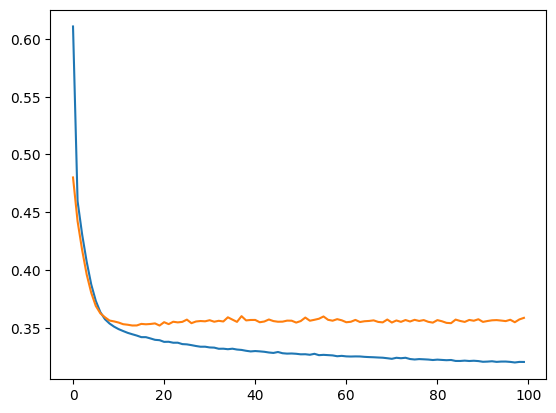

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

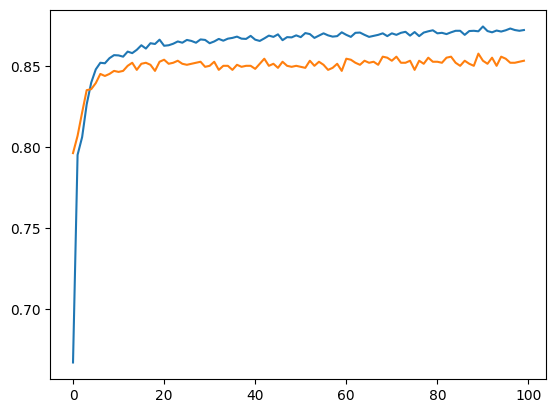

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [25]:
import keras_tuner as kt

In [56]:
def build_model(hp):
  model = Sequential()
  counter = 0
  for i in range(hp.Int('num_layers',min_value = 1, max_value=5)):
      if counter == 0:
          model.add(Dense(
              hp.Choice('units', [8, 16, 32]),
              activation=hp.Choice('activation',values=['relu','selu','elu']),input_dim =11))
          model.add(Dropout(hp.Choice('dropout',values=[0.2,0.3,0.4,0.5,0.6,0.7])))
      else:
          model.add(Dense(
              hp.Choice('units', [8, 16, 32]),
              activation=hp.Choice('activation',values=['relu','selu','elu'])))
          model.add(Dropout(hp.Choice('dropout',values=[0.2,0.3,0.4,0.5,0.6,0.7])))
      counter += 1
  model.add(Dense(1, activation='sigmoid'))
    
  model.compile(loss='binary_crossentropy',
                optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','adadelta']),
                metrics=['accuracy'])
  return model


In [57]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='mydir',
    project_name='final1')

In [58]:
tuner.search(X_train_scaled,Y_train, epochs=5, validation_data=(X_test_scaled,Y_test))

Trial 5 Complete [00h 00m 09s]
val_accuracy: 0.7925000190734863

Best val_accuracy So Far: 0.8370000123977661
Total elapsed time: 00h 00m 33s


In [59]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units': 32,
 'activation': 'selu',
 'dropout': 0.2,
 'optimizer': 'adam'}

In [60]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [61]:
h1 = model.fit(X_train_scaled,Y_train, epochs=100,initial_epoch=6, validation_data=(X_test_scaled,Y_test))

Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8303 - loss: 0.4020 - val_accuracy: 0.8495 - val_loss: 0.3629
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8331 - loss: 0.4054 - val_accuracy: 0.8525 - val_loss: 0.3601
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8333 - loss: 0.3961 - val_accuracy: 0.8540 - val_loss: 0.3529
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8364 - loss: 0.3862 - val_accuracy: 0.8535 - val_loss: 0.3521
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8387 - loss: 0.3823 - val_accuracy: 0.8535 - val_loss: 0.3500
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8423 - loss: 0.3827 - val_accuracy: 0.8565 - val_loss: 0.3498
Epoch 13/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8448 - loss: 0.3729 - val_accuracy: 0.8530 - val_loss: 0.3538
Epoch 14/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8439 - loss: 0.3743 - val

In [62]:
y_log = model.predict(X_test_scaled)
y_predict = np.where(y_log > 0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_predict)

0.866

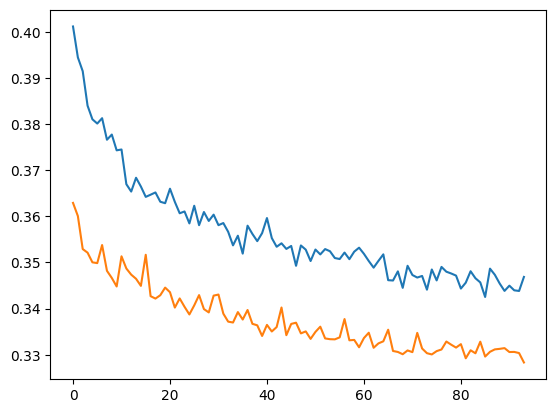

In [64]:
import matplotlib.pyplot as plt

plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])

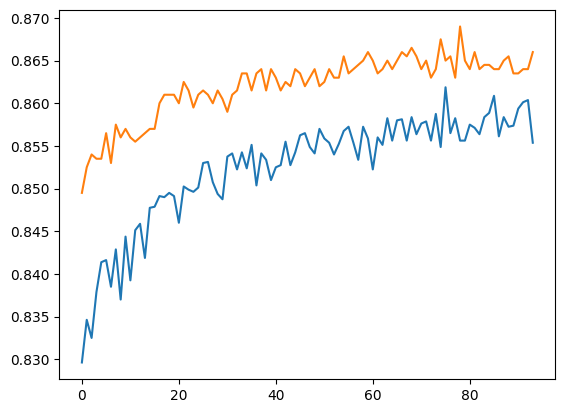

In [65]:
import matplotlib.pyplot as plt

plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])